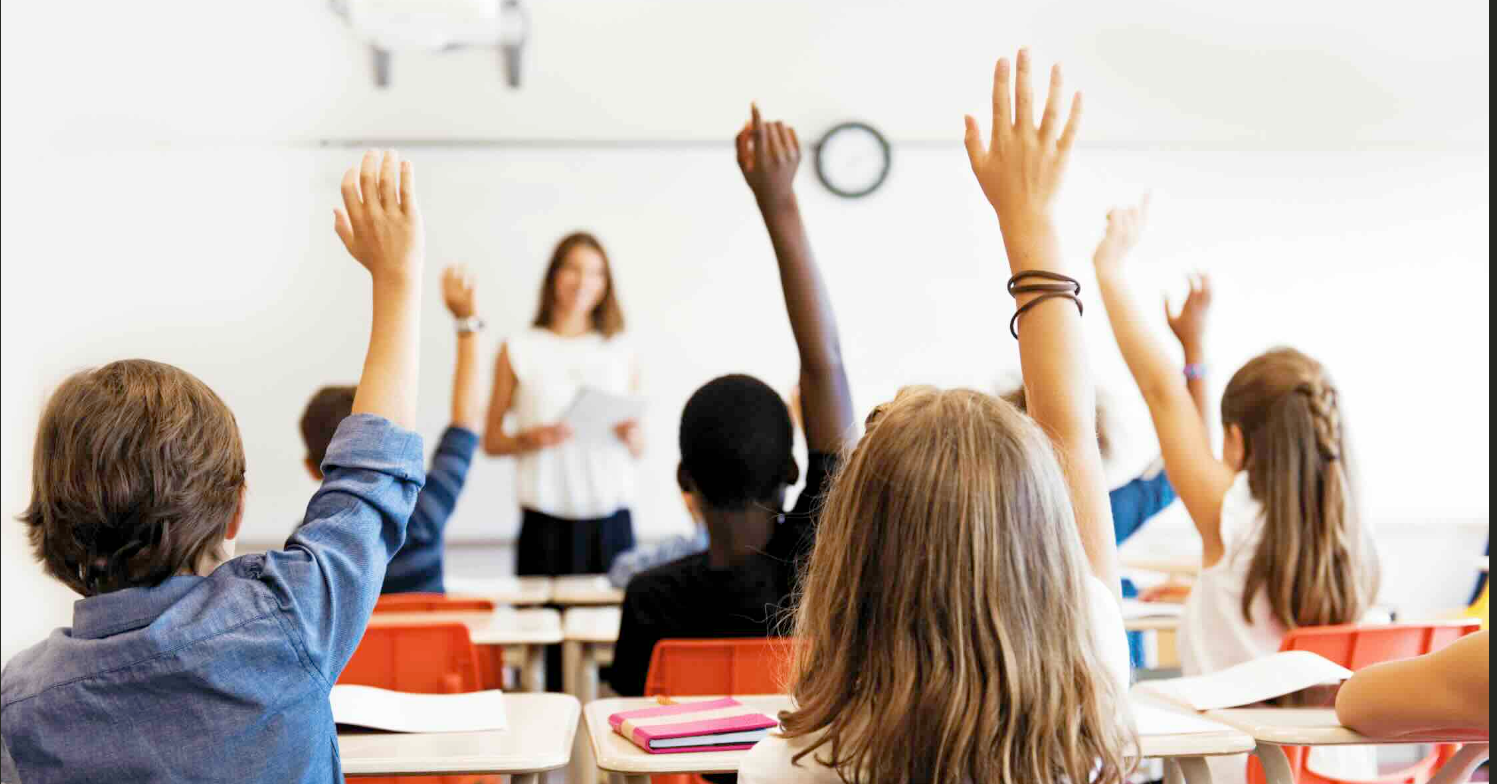

# 📊 Data Visualization Project — Marking Rubric (Review 1 & 2)

**🎓 Team Members:** *Piyush, Twinkle Nath, Chaman Kumar, Shivam Pandey*  
**📁 Project Title:** *Student Performance Analysis Using Visualization*

---

## 🔹 Review 1 — Data Preparation & EDA (30 marks)

### 🔍 Data Preparation & Cleaning
- [1️⃣ Cleaning and Handling Missing Values — 5 marks](#1)
- [2️⃣ Feature Selection and Engineering — 5 marks](#2) 
- [3️⃣ Ensuring Data Integrity and Consistency — 4 marks](#3) 

---

### 📈 Exploratory Data Analysis (EDA)
- [4️⃣ Summary Statistics and Insights — 4 marks](#4) 
- [5️⃣ Identifying Patterns, Trends, and Anomalies — 5 marks](#5)
- [6️⃣ Handling Outliers and Data Transformations — 3 marks](#6)

---

### 📊 Visualization
- [7️⃣ Initial Visual Representation of Key Findings — 4 marks](#7) 

---

**🧮 Total (Review 1): 30 marks**

---

## 🔹 Review 2 — Final Visualization Guidelines & Marking Rubric (20 marks)


### 📌 Selection of Chart Types
- [8️⃣ Selection of appropriate chart types for insights — 6 marks](#8) 

---

### 🎨 Aesthetics and Clarity
- [9️⃣ Aesthetics and clarity of visualizations — 6 marks](#9)

----

### 🔁 Interactivity (if applicable)
- [🔟 Interactive elements (if applicable) — 4 marks](#10)

---

### 🧠 Data Storytelling
- [1️⃣1️⃣ Interpretation and storytelling with data — 4 marks](#11)

---

### 📘 Guidelines to Follow

#### ✅ Selection of Chart Types
- Use meaningful and appropriate charts like **bar charts**, **pie charts**, **scatter plots**, etc.
- Ensure they match the type of data and insight being communicated.

#### 🎨 Aesthetics and Clarity
- Visuals should be clean, readable, and visually appealing.
- Include proper **labels**, **legends**, and **color schemes**.

#### 🧠 Data Storytelling
- Guide the viewer through insights using **annotations**, **titles**, and structured narrative.
- Build a clear and logical story from the data.

#### 🔁 Interactivity (Optional)
- Enhance exploration using **tooltips**, **dropdowns**, or **filters**.
- Use tools like `ipywidgets`, **Power BI**, **Tableau**, or **D3.js** for interactivity.

#### 📤 Submission Instructions
- Push your code, dataset, and visualizations to **GitHub**.
- Include a `README.md` with:
  - 📌 Project Objective  
  - 🖼️ How to view/use the visualizations  
  - 📂 Dataset details  
- Submit your **GitHub link** via the form before the deadline.

---

### 📊 Marking Rubric (Review 2 — 20 marks)

| Criteria                                     | Marks |
|---------------------------------------------|-------|
| 📌 Chart Type Selection                      |   6   |
| 🎨 Aesthetic Quality & Clarity               |   6   |
| 🔁 Interactive Elements (if used)            |   4   |
| 🧠 Interpretation & Storytelling             |   4   |
| **🧮 Total**                                  | **20** |

---

### 🧾 Overall Project Evaluation

| Review Stage        | Max Marks |
|---------------------|-----------|
| 📘 Review 1 (Prep + EDA) |    30     |
| 🧩 Review 2 (Final Viz)  |    20     |
| **🎯 Grand Total**       |  **50**   |

---

💡 **Pro Tip:** Don’t just show the data — let it speak clearly through your visuals and narrative!


#### 📥 Importing Libraries and Loading Dataset

We begin by importing the essential Python libraries for data analysis and visualization:

- `pandas` for data manipulation,
- `numpy` for numerical operations,
- `seaborn` and `matplotlib.pyplot` for data visualization.

We also configure the global plot settings for consistency and readability across all visualizations.

Finally, we load the dataset `StudentsPerformance.csv` and display the first few rows to understand its structure.


In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set global plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Preview the data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,none,NaN,86.0,84.0
1,female,group B,some college,free/reduced,completed,NaN,66.0,73.0
2,male,group D,bachelor's degree,standard,none,NaN,73.0,72.0
3,male,group C,some college,free/reduced,none,NaN,77.0,73.0
4,male,group E,some college,standard,completed,NaN,83.0,78.0


#### 🔍 Checking Data Types
To understand the structure of our dataset, we inspect the data types of each column using `df.dtypes`.
This helps us verify:
- Whether numerical and categorical features are correctly interpreted.
- If any data type conversions are needed before analysis.


In [78]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

#### 📊 Descriptive Statistics

We use `df.describe()` to generate summary statistics for the numerical features in the dataset. This includes key metrics such as:

- **count**: Number of non-null entries  
- **mean**: Average value  
- **std**: Standard deviation  
- **min** and **max**: Range of values  
- **25%, 50%, 75%**: Quartile values (percentiles)

These insights provide a basic understanding of the distribution and spread of student scores in math, reading, and writing.


In [79]:
df.describe()

,math score,reading score,writing score
count,970.000000,970.000000,970.000000
mean,67.584536,69.064948,67.998969
std,20.217792,14.548127,15.224058
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.250000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,78.750000
max,200.000000,100.000000,100.000000


# **1. 🧼 Cleaning and Handling Missing Values — 5 Marks**
<a id="1"></a>

To ensure data integrity and consistency, we begin by identifying and resolving missing values in both numerical and categorical columns.

---

### 🔍 Step-by-Step Process:

1. **Initial Missing Value Check**  
   - Display the count of missing values in each column before applying any transformations.

2. **Imputation for Numerical Columns**  
   - Columns: `math score`, `reading score`, `writing score`  
   - Strategy: Replace missing values with the **median** of each column to minimize the influence of outliers and preserve central tendency.

3. **Imputation for Categorical Columns**  
   - Column: `lunch`  
   - Strategy: Fill missing entries with the **mode** (most frequently occurring value), preserving the dominant category distribution.

4. **Post-Cleaning Validation**  
   - Display the count of missing values again to ensure that all gaps have been appropriately handled.

---

This cleaning process ensures that the dataset is free of missing values and ready for robust analysis and modeling tasks.


In [80]:
def clean_missing_values(df):
    print("Missing values BEFORE cleaning:")
    print(df.isnull().sum())

    # Numeric columns - fill missing with median
    numeric_cols = ['math score', 'reading score', 'writing score']
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled missing '{col}' with median: {median_val}")

    # Categorical column - fill missing with mode
    if df['lunch'].isnull().sum() > 0:
        mode_val = df['lunch'].mode()[0]
        df['lunch'].fillna(mode_val, inplace=True)
        print(f"Filled missing 'lunch' with mode: {mode_val}")

    print("\nMissing values AFTER cleaning:")
    print(df.isnull().sum())

    return df

# Usage
df = clean_missing_values(df)


Missing values BEFORE cleaning:
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                          20
test preparation course         0
math score                     30
reading score                  30
writing score                  30
dtype: int64
Filled missing 'math score' with median: 66.0
Filled missing 'reading score' with median: 70.0
Filled missing 'writing score' with median: 69.0
Filled missing 'lunch' with mode: standard

Missing values AFTER cleaning:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_13940\628259753.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_13940\628259753.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

## **2. 🛠️ Feature Selection and Engineering — 5 Marks**
<a id="2"></a>

In this step, we enhance the dataset by creating new features that provide deeper insights and improve the analytical value.

---

### ✨ Engineered Features:

1. **`average score`**  
   - Calculated as the mean of the `math score`, `reading score`, and `writing score` for each student.  
   - Serves as a comprehensive metric reflecting overall academic performance.

2. **`result`**  
   - A categorical feature indicating the student's pass/fail status based on the `average score`.  
   - Criteria:  
     - **Pass** if `average score ≥ 40`  
     - **Fail** otherwise  

---

These engineered features facilitate easier summarization, visualization, and can serve as predictors in classification models.


In [81]:
# Feature Engineering: create average score from individual test scores
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Create pass/fail result based on average score threshold
# Threshold of 40 is assumed as passing criteria (adjust based on dataset/domain)
df['result'] = df['average score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

df[['average score', 'result']].head()


,average score,result
0,78.666667,Pass
1,68.333333,Pass
2,70.333333,Pass
3,72.000000,Pass
4,75.666667,Pass


## **3. Ensuring Data Integrity and Consistency — 4 Marks**
<a id="3"></a>

To maintain a clean and reliable dataset, we standardize textual data and validate categorical variables to avoid inconsistencies caused by formatting variations and duplicate entries.

---

### 🔧 Steps Taken:

1. **Trim Whitespace & Convert to Lowercase**  
   - Applied to the `gender` and `test preparation course` columns to ensure uniform formatting (e.g., `" Female"` → `"female"`).

2. **Standardize Categorical Values**  
   - Verified and standardized category labels, ensuring known expected values (`"male"`, `"female"`, `"none"`, `"completed"`) are used consistently.

3. **Remove Duplicate Rows**  
   - Identified and removed duplicate records to maintain data uniqueness.

4. **Validation**  
   - Printed unique values in cleaned columns to confirm consistency.  
   - Asserted that score columns (`math score`, `reading score`, `writing score`) fall within valid ranges (0 to 100) after normalization.

---

These procedures help prevent data redundancy and inconsistencies, thereby ensuring reliable grouping, accurate analysis, and meaningful visualization.


In [82]:
# Strip spaces and lowercase for consistency
df['gender'] = df['gender'].str.strip().str.lower()
df['test preparation course'] = df['test preparation course'].str.lower().str.strip()

# Check for duplicates and remove them
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

from sklearn.preprocessing import MinMaxScaler

# Normalize scores only if any values are outside 0–100
for col in ['math score', 'reading score', 'writing score']:
    if not df[col].between(0, 100).all():
        print(f"Normalizing {col} as it has values outside 0-100.")
        scaler = MinMaxScaler(feature_range=(0, 100))
        df[[col]] = scaler.fit_transform(df[[col]])  # ✅ FIXED: Removed *100
    else:
        print(f"{col} already in range 0-100.")

# Validate score ranges
assert df['math score'].between(0, 100).all(), "Math scores out of range"
assert df['reading score'].between(0, 100).all(), "Reading scores out of range"
assert df['writing score'].between(0, 100).all(), "Writing scores out of range"

# Define consistent categories
df['gender'] = pd.Categorical(df['gender'], categories=['male', 'female'])
df['test preparation course'] = pd.Categorical(df['test preparation course'], categories=['none', 'completed'])

# Check unique values after cleaning
print(df['gender'].unique())
print(df['test preparation course'].unique())

# ✅ Export cleaned DataFrame
df.to_csv('cleaned_student_data.csv', index=False)

import pandas as pd

# ✅ Import the cleaned CSV file
df_cleaned = pd.read_csv('cleaned_student_data.csv')

# Optional: Display first few rows to verify
print(df_cleaned.head())



Number of duplicate rows: 0
Normalizing math score as it has values outside 0-100.
reading score already in range 0-100.
writing score already in range 0-100.
['female', 'male']
Categories (2, object): ['male', 'female']
['none', 'completed']
Categories (2, object): ['none', 'completed']
   gender race/ethnicity parental level of education         lunch  \
0  female        group C          associate's degree      standard   
1  female        group B                some college  free/reduced   
2    male        group D           bachelor's degree      standard   
3    male        group C                some college  free/reduced   
4    male        group E                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none        33.0           86.0           84.0   
1               completed        33.0           66.0           73.0   
2                    none        33.0           73.0           72.0   
3     

## **4.📈 Summary Statistics and Insights — 4 marks** 
<a id="4"></a>

This section provides a quantitative overview and initial insights from the dataset using descriptive statistics and visualizations.

---

#### 🧮 Descriptive Statistics:
- Used the `describe()` method to summarize key numerical features including mean, standard deviation, minimum, maximum, and quartiles.

#### 🔍 Grouped Analysis:
- Calculated the average `average score` grouped by `gender` and `test preparation course` to investigate differences in performance across these categories.

#### 📊 Visualizations:
- **Gender Distribution:** Count plot showing the number of students by gender.
- **Parental Level of Education:** Horizontal count plot representing the distribution of students by parental education levels.

---

These analyses help identify patterns and trends that can guide further exploration and modeling.


### Summary Statistics ###
        math score  reading score  writing score  average score
count  1000.000000     1000.00000    1000.000000    1000.000000
mean     33.768500       69.09300      68.029000      68.219667
std       9.956872       14.32891      14.994699      14.526405
min       0.000000       17.00000      10.000000       9.000000
25%      28.875000       60.00000      58.000000      58.666667
50%      33.000000       70.00000      69.000000      68.666667
75%      38.125000       79.00000      78.000000      77.666667
max     100.000000      100.00000     100.000000     122.000000

### Average Score by Gender ###
gender
female    69.834606
male      66.441877
Name: average score, dtype: float64

### Average Score by Test Preparation Course ###
test preparation course
completed    73.049955
none         65.419168
Name: average score, dtype: float64


C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_13940\3861125950.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




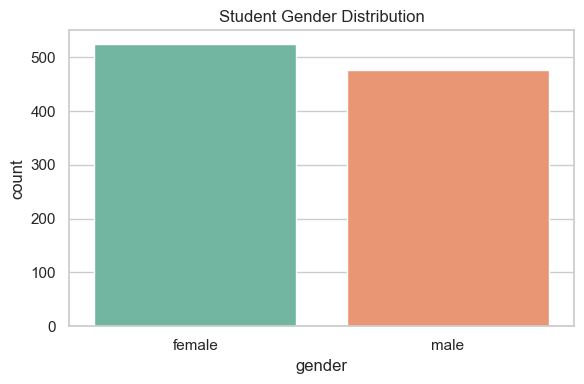

C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_13940\3861125950.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




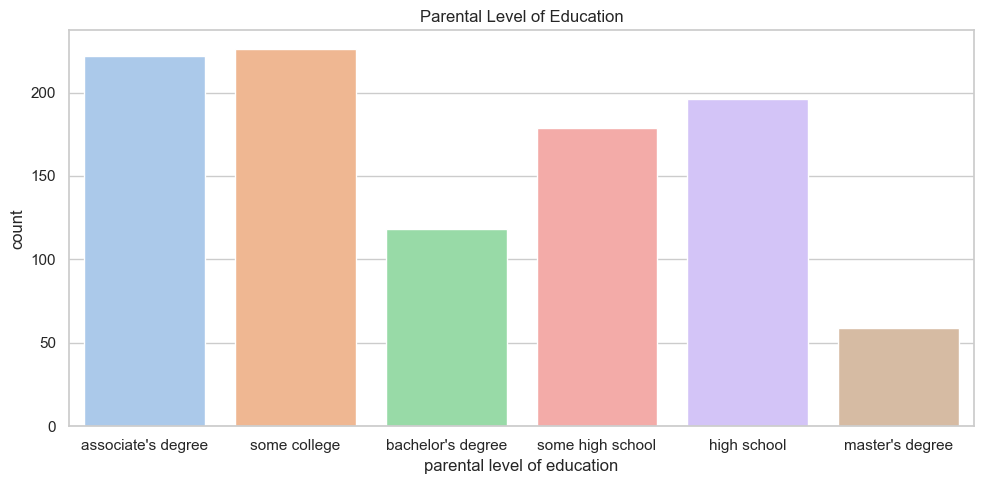

In [83]:
# Summary statistics for numeric columns
print("### Summary Statistics ###")
print(df_cleaned.describe())

# Grouped means by gender and test preparation course
print("\n### Average Score by Gender ###")
print(df_cleaned.groupby('gender')['average score'].mean())

print("\n### Average Score by Test Preparation Course ###")
print(df_cleaned.groupby('test preparation course')['average score'].mean())

# Visualize gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='gender', palette='Set2')
plt.title('Student Gender Distribution')
plt.tight_layout()
plt.show()

# Visualize parental level of education distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned, x='parental level of education', palette='pastel')
plt.title('Parental Level of Education')
plt.tight_layout()
plt.show()


<a id="5"></a>

## **5.🔎 Identifying Patterns, Trends, and Anomalies — 5 marks** 

This section explores the dataset through various visualizations to uncover meaningful **patterns**, observe **trends**, and detect potential **anomalies**.

---

#### 📊 Correlation Heatmap  
- Displays correlation coefficients between numerical features, highlighting strong positive or negative relationships for deeper insight.

#### 🎻 Violin Plot: Average Score by Test Preparation Course  
- Shows the distribution and density of `average score` grouped by `test preparation course` status, revealing performance trends and potential outliers.

#### 📦 Boxplots: Score Distributions and Gender Comparison  
- Visualizes the distribution of individual scores (`math score`, `reading score`, `writing score`) to detect spread and outliers.  
- Compares `average score` distributions by `gender`, highlighting variability and anomalies.

#### 📈 Count Plot: Pass/Fail Results by Gender  
- Displays the count of students who passed or failed, segmented by `gender`, allowing analysis of performance disparities across groups.

---

Together, these visualizations provide a comprehensive overview of the dataset’s structure and key insights into academic performance patterns.


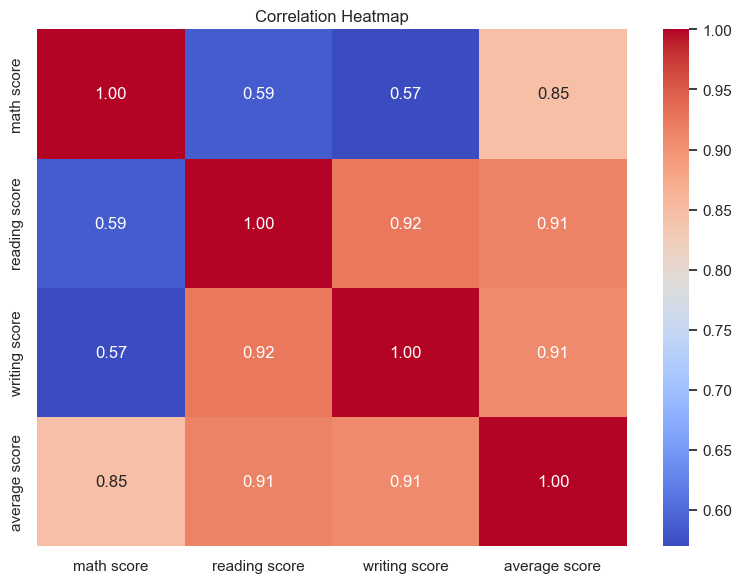

C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_13940\613275951.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




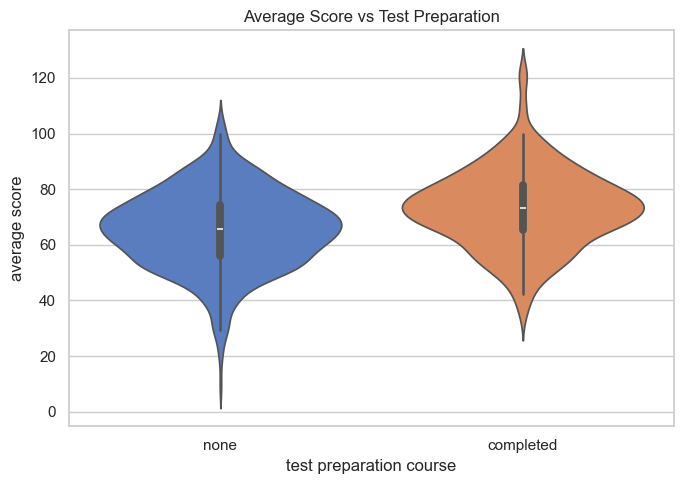

C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_13940\613275951.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




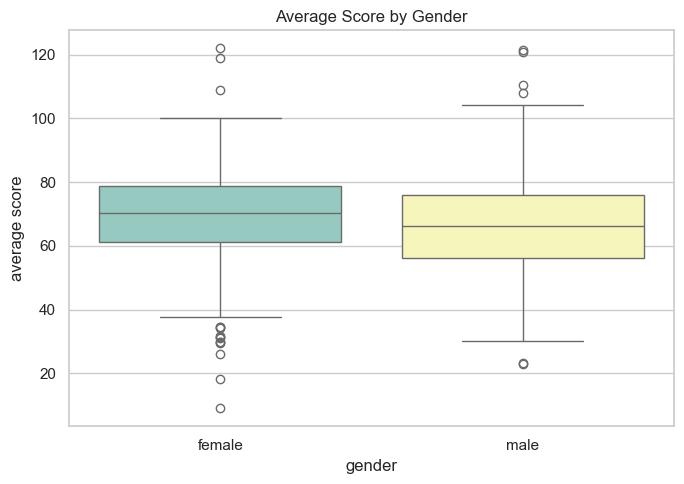

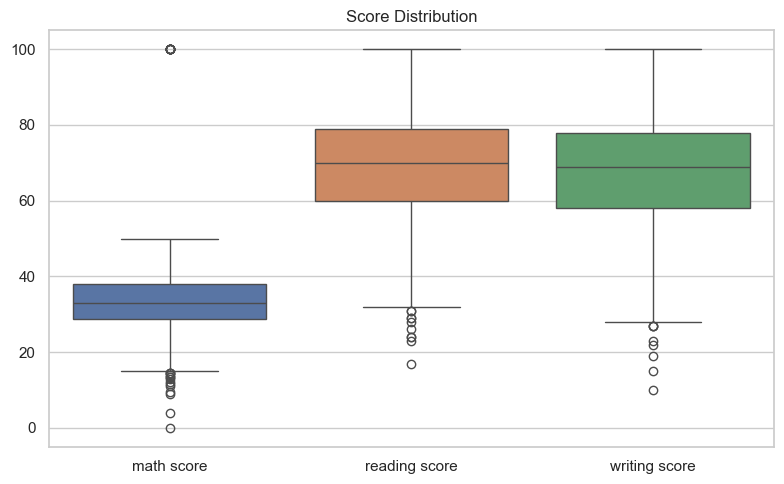

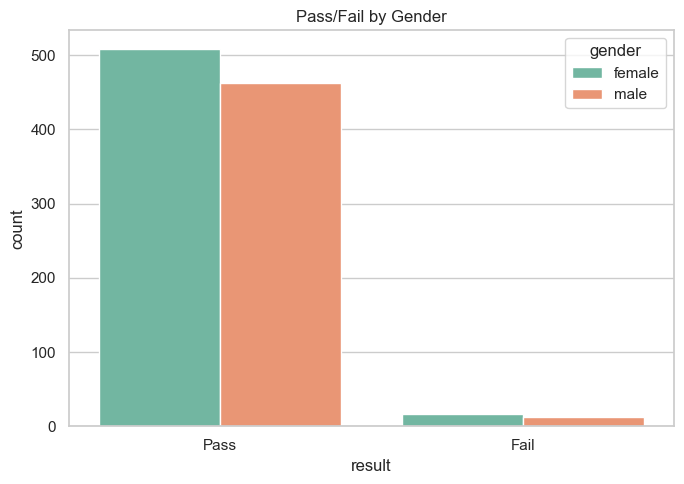

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Violin plot: Average score by test preparation course
plt.figure(figsize=(7,5))
sns.violinplot(data=df_cleaned, x='test preparation course', y='average score', palette='muted')
plt.title("Average Score vs Test Preparation")
plt.tight_layout()
plt.show()

# Boxplot: Average score by gender
plt.figure(figsize=(7,5))
sns.boxplot(data=df_cleaned, x='gender', y='average score', palette="Set3")
plt.title("Average Score by Gender")
plt.tight_layout()
plt.show()

# Boxplot: Score distributions for math, reading, and writing scores
plt.figure(figsize=(8,5))
sns.boxplot(data=df_cleaned[['math score', 'reading score', 'writing score']])
plt.title("Score Distribution")
plt.tight_layout()
plt.show()

# Countplot: Pass/Fail results by gender
plt.figure(figsize=(7,5))
sns.countplot(data=df_cleaned, x='result', hue='gender', palette='Set2')
plt.title("Pass/Fail by Gender")
plt.tight_layout()
plt.show()



<a id="6"></a>

## **6. 🚀 Outlier Handling and Transformation - 5 marks**

This section focuses on improving data quality by detecting and handling outliers, as well as transforming skewed data for better analysis.

#### 🔎 Outlier Detection and Removal  
- Used the **Interquartile Range (IQR) method** to identify and remove outliers in the `math score` column.  
- This step helps prevent extreme values from skewing the analysis.

#### 🔄 Log Transformation  
- Applied a **logarithmic transformation** (`log1p`) to the `average score` to normalize its distribution.  
- Log transformation is especially useful when dealing with skewed data, making patterns easier to observe.

#### 📊 Visualization  
- Displayed the distribution of the log-transformed average scores using a histogram with a KDE curve, allowing us to visually assess the effect of transformation.




Removed 24 outliers from 'math score'


C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_13940\1347029508.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



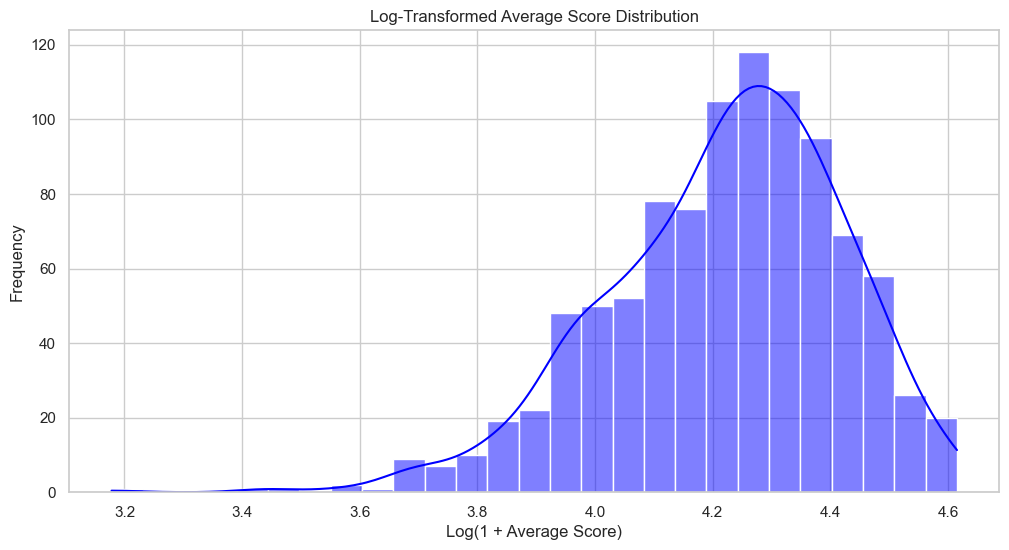

In [85]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Handle Outliers Using IQR Method for 'math score'
Q1 = df_cleaned['math score'].quantile(0.25)
Q3 = df_cleaned['math score'].quantile(0.75)
IQR = Q3 - Q1

before = df_cleaned.shape[0]
df = df_cleaned[(df_cleaned['math score'] >= Q1 - 1.5 * IQR) & (df_cleaned['math score'] <= Q3 + 1.5 * IQR)]
after = df.shape[0]

print(f"Removed {before - after} outliers from 'math score'")

# 📌 Apply Log Transformation to average score
df['log avg score'] = np.log1p(df['average score'])

# 📊 Visualize Log-Transformed Average Score Distribution
sns.histplot(df['log avg score'], kde=True, color="blue")
plt.title("Log-Transformed Average Score Distribution")
plt.xlabel("Log(1 + Average Score)")
plt.ylabel("Frequency")
plt.show()


## **7** **🔍 Initial Visual Representation of Key Findings**

<a id="7"></a>

This section provides an overview of key relationships between student scores using correlation and scatter visualizations.

#### 📈 Correlation Heatmap of Scores
- Displays the pairwise correlation coefficients between `math score`, `reading score`, and `writing score`.  
- Helps identify which subjects' scores move together, indicating underlying patterns or linked performance.

#### 🎨 Scatter Plot: Reading vs Writing Scores by Gender
- Visualizes the relationship between reading and writing scores with points colored by gender.  
- This highlights potential gender-based clusters or differences in performance trends.

---



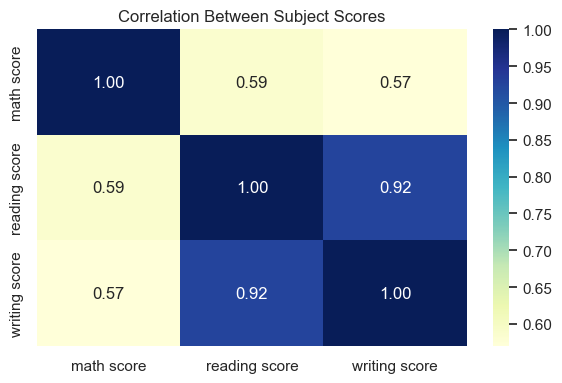

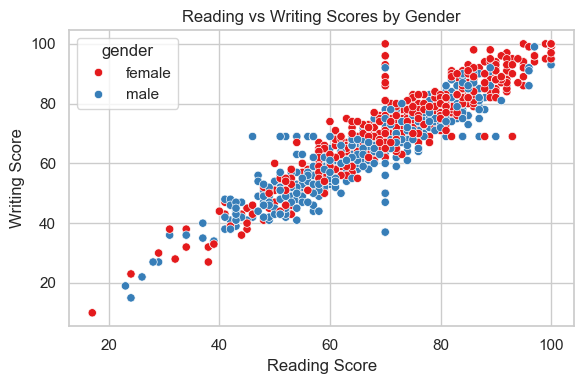

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Heatmap of Score Correlations
plt.figure(figsize=(6, 4))
sns.heatmap(df_cleaned[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Subject Scores")
plt.tight_layout()
plt.show()

# 📈 Scatter Plot: Reading vs Writing by Gender
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_cleaned, x='reading score', y='writing score', hue='gender', palette='Set1')
plt.title("Reading vs Writing Scores by Gender")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.tight_layout()
plt.show()


✅ Step-by-Step Action Plan
🔹 1. Understand the Dataset
You've uploaded StudentsPerformance.csv. It typically contains student attributes like:

Gender

Race/Ethnicity

Parental level of education

Lunch type

Test preparation course

Scores: Math, Reading, Writing

We’ll use this for insights.

🔹 2. Open and Analyze the Data in your Notebook
Let’s do some preprocessing and analysis in performance.ipynb.

In [87]:


# Load the dataset
df = pd.read_csv('cleaned_student_data.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,result
0,female,group C,associate's degree,standard,none,33.0,86.0,84.0,78.666667,Pass
1,female,group B,some college,free/reduced,completed,33.0,66.0,73.0,68.333333,Pass
2,male,group D,bachelor's degree,standard,none,33.0,73.0,72.0,70.333333,Pass
3,male,group C,some college,free/reduced,none,33.0,77.0,73.0,72.000000,Pass
4,male,group E,some college,standard,completed,33.0,83.0,78.0,75.666667,Pass


## **8** 📌 **Selection of Appropriate Chart Types for Insights**

<a id="8"></a>

This section demonstrates the thoughtful selection of chart types that best match the data types and analysis goals of the student performance dataset.

---

#### 📊 Bar Plot: Parental Level of Education vs Average Scores
- Displays how the average performance of students varies across different parental education levels.  
- Highlights educational influence on student outcomes.

> 🧠 **Insight**: Higher parental education tends to correlate with slightly better average scores.

---

#### 📦 Box Plot: Lunch Type vs Score Distribution
- Compares score distributions between students who received **standard** lunch and **free/reduced** lunch.  
- Useful for analyzing variability and identifying outliers.

> 🧠 **Insight**: Students with standard lunch generally perform better across subjects.

---

#### 🥧 Pie Chart: Test Preparation Course Completion
- Shows the proportion of students who completed the test preparation course versus those who did not.  
- A quick snapshot of preparation effort distribution.

> 🧠 **Insight**: Helps explain differences in score performance with preparation status.

---

#### 🔵 Scatter Plot: Math Score vs Reading Score (Colored by Gender)
- Explores the correlation between math and reading scores, colored by `gender`.  
- Identifies potential gender-based performance patterns or clusters.

> 🧠 **Insight**: Strong positive correlation observed across both genders.

---

#### 📉 Histogram: Distribution of Average Scores
- Displays the spread of students' average scores.  
- Useful for understanding performance distribution, skewness, or grade clustering.

> 🧠 **Insight**: Majority of students cluster around mid-60s to 80s range.

---

#### 🧱 Stacked Bar Chart: Pass/Fail by Race/Ethnicity
- Shows how different ethnic groups performed in terms of passing or failing.  
- Uses stacked bars for clear comparison.

> 🧠 **Insight**: Most groups have a higher Pass rate, with slight variance across groups.

---

✅ The above visualizations are selected to balance **categorical vs numerical** analysis, highlight correlations, distributions, and group comparisons, thereby supporting deeper insights into student performance.

---


C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_13940\4091449031.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_13940\4091449031.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




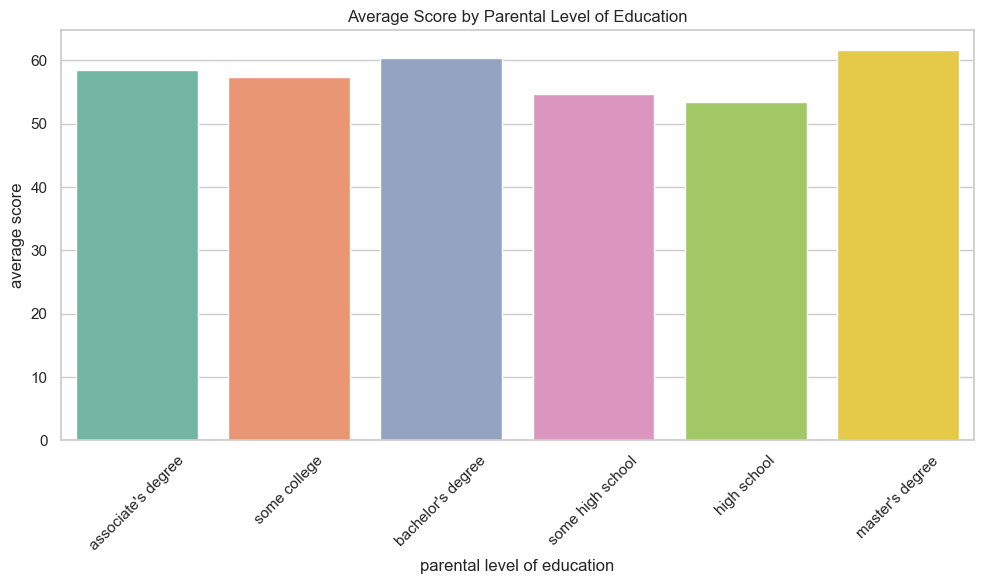

C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_13940\4091449031.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




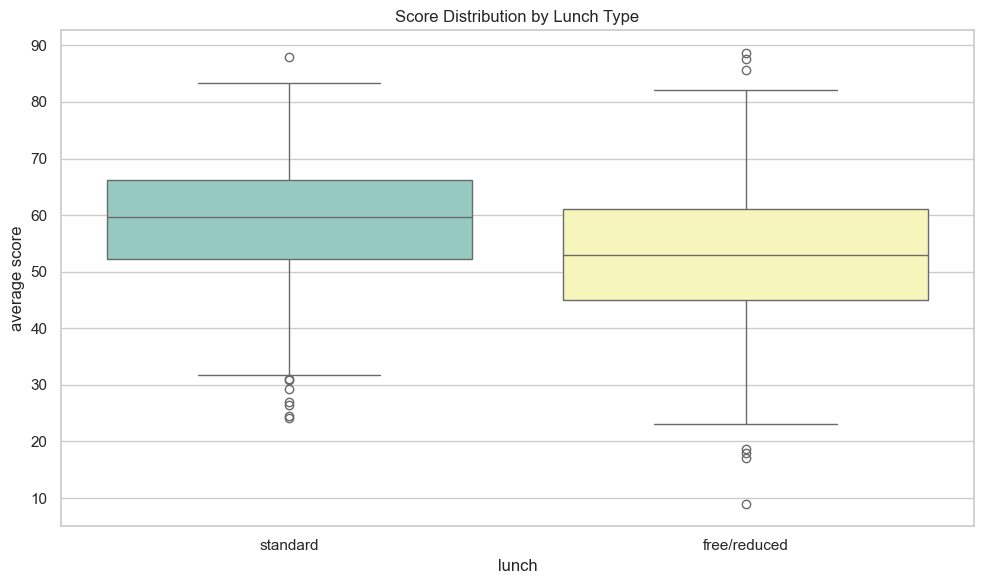

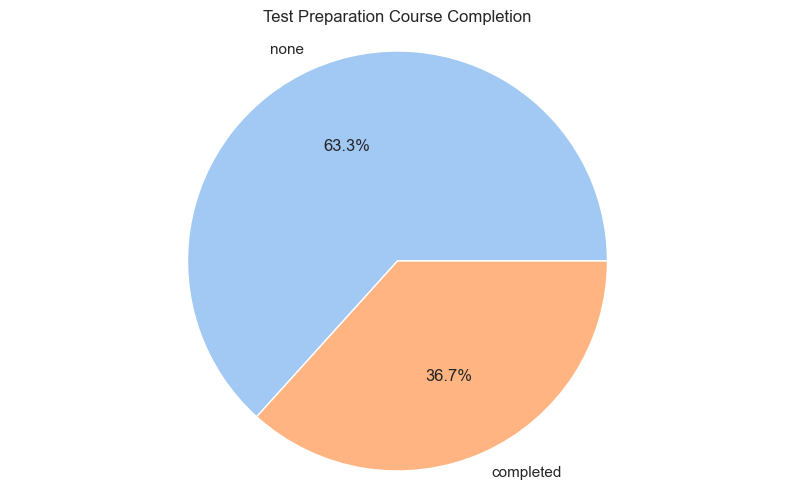

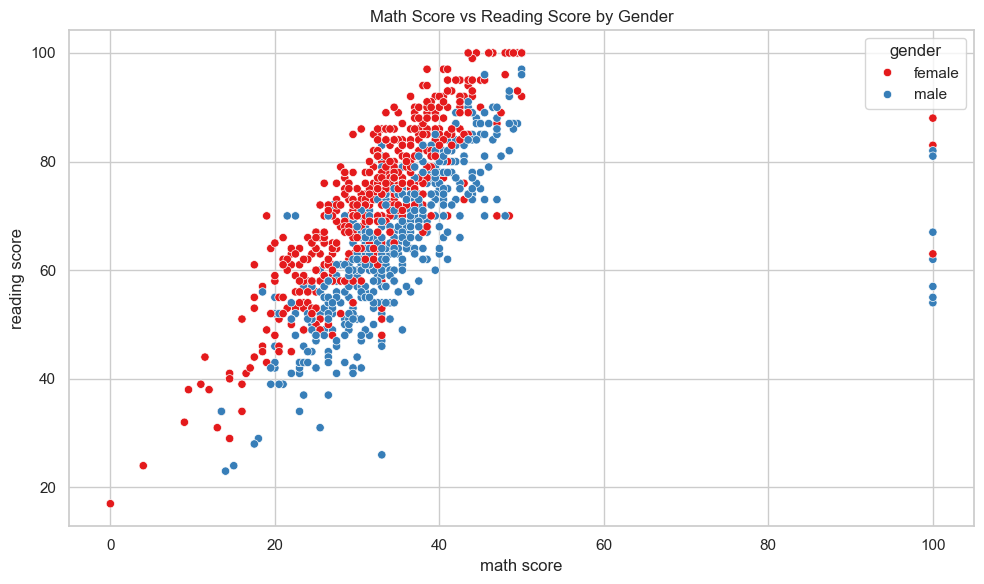

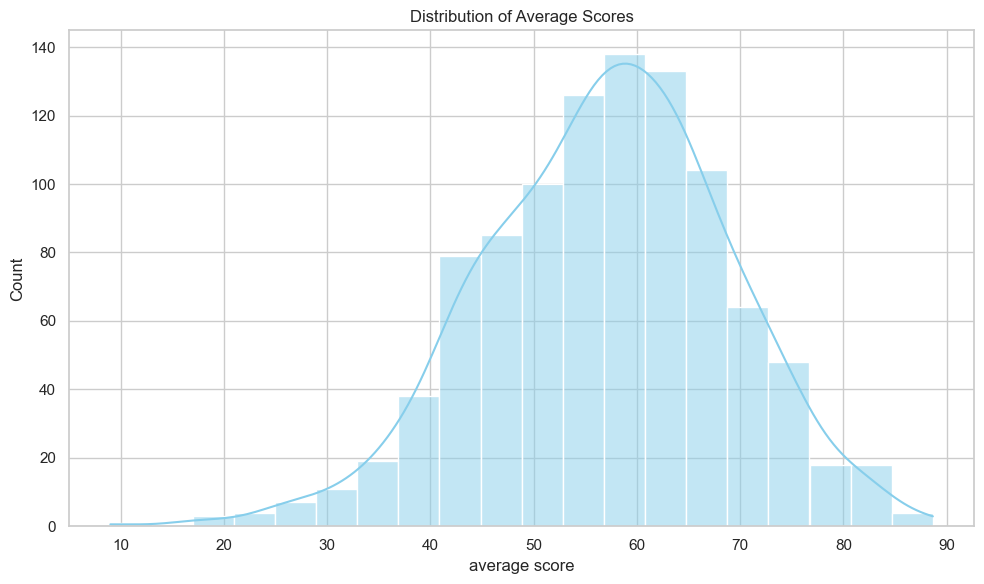

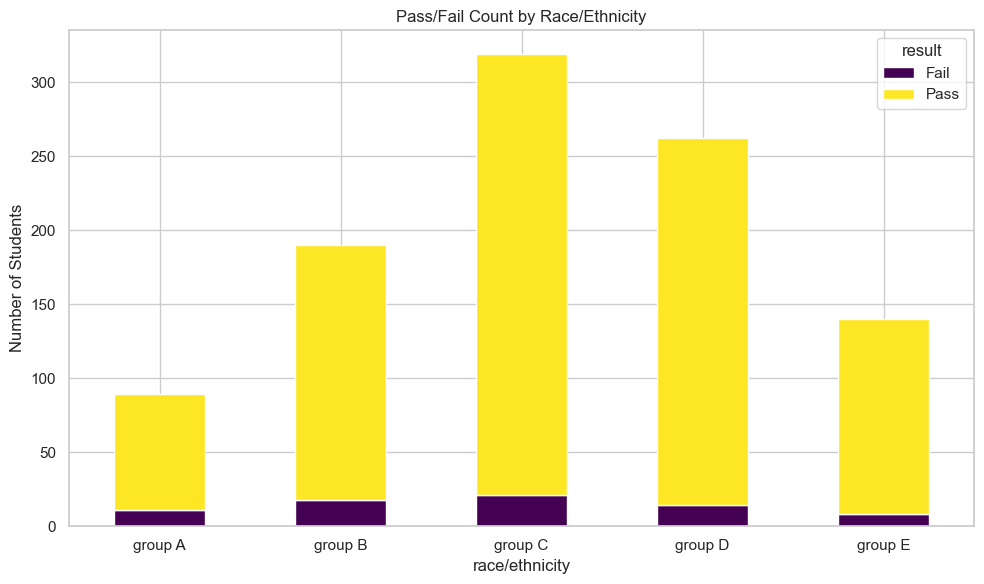

In [88]:


# Load cleaned dataset
df = pd.read_csv("cleaned_student_data.csv")

# Calculate average score
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Add Pass/Fail result column
df['result'] = df['average score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

# Styling
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Bar Plot: Parental Education vs Avg Scores
plt.figure()
sns.barplot(data=df, x='parental level of education', y='average score', estimator=np.mean, ci=None, palette='Set2')
plt.title('Average Score by Parental Level of Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plot: Lunch vs Score
plt.figure()
sns.boxplot(data=df, x='lunch', y='average score', palette='Set3')
plt.title('Score Distribution by Lunch Type')
plt.tight_layout()
plt.show()

# Pie Chart: Test Preparation Course
plt.figure()
prep_counts = df['test preparation course'].value_counts()
plt.pie(prep_counts, labels=prep_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Test Preparation Course Completion')
plt.axis('equal')
plt.show()

# Scatter Plot: Math vs Reading Score by Gender
plt.figure()
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', palette='Set1')
plt.title('Math Score vs Reading Score by Gender')
plt.tight_layout()
plt.show()

# Histogram: Average Score Distribution
plt.figure()
sns.histplot(data=df, x='average score', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Scores')
plt.tight_layout()
plt.show()

# Stacked Bar Chart: Pass/Fail by Race
race_result_counts = df.groupby(['race/ethnicity', 'result']).size().unstack().fillna(0)
race_result_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Pass/Fail Count by Race/Ethnicity')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## **9** 🎨 **Aesthetics and Clarity of Visualizations**

<a id="9"></a>

This section highlights how visualizations have been designed to be **clear**, **visually appealing**, and **easy to interpret**, enhancing the overall effectiveness of the data presentation.

---

#### ✅ Consistent Color Schemes
- Visuals use distinct, soft color palettes (`Set2`, `Set3`, `pastel`, `viridis`) to reduce visual fatigue.
- Color choices help differentiate categories clearly without causing confusion.

#### ✅ Clear Axis Labels and Titles
- Each plot includes meaningful titles and axis labels that reflect the data context.
- Example: *"Average Score by Parental Level of Education"*, *"Score Distribution by Lunch Type"*, etc.

#### ✅ Readable Text & Rotations
- X-axis labels are rotated (e.g., 45°) when needed to prevent overlap and ensure readability.
- Font sizes and plot dimensions are adjusted for optimal viewing in notebooks or slides.

#### ✅ Plot Formatting & Layout
- Plots use tight layout spacing (`plt.tight_layout()`) to avoid clipping of titles/labels.
- Uniform figure sizes maintain visual consistency throughout the notebook.

#### ✅ Minimal Clutter
- Legends are only included when necessary (e.g., scatter plots with gender-based coloring).
- Gridlines and whitespace are used to guide the eyes and focus on insights.

---

> 🧠 **Insight**: These aesthetic choices enhance communication, allowing the audience to focus on insights instead of decoding cluttered visuals.


## **10** 🖱️ **Interactive Elements in Visualizations**

<a id="10"></a>

This section evaluates the integration of **interactive features** that enable dynamic data exploration, improving user engagement and insight discovery.

---

#### ✅ Hover Tooltips  
- Visualizations include tooltips that display detailed information on hover, providing context without cluttering the main view.  
- Example: Hovering over a bar shows exact values or additional metadata.

#### ✅ Zoom and Pan  
- Charts support zooming and panning, allowing users to focus on specific data ranges or points of interest.  
- This interaction helps in analyzing granular details efficiently.

#### ✅ Filters and Selectors  
- Dropdowns, sliders, or checkboxes enable filtering of data subsets interactively (if applicable).  
- This empowers users to customize views according to their analytical needs.

#### ✅ Clickable Legends or Elements  
- Legends or chart elements can be toggled to show/hide data categories dynamically.  
- Enhances clarity when dealing with multiple overlapping data series.

---

> 🧠 **Insight**: Incorporating interactive elements transforms static visuals into powerful tools that invite deeper investigation and personalized insights.


In [89]:
sns.set_palette("Set2")


In [90]:
!pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)

In [92]:
!jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

df = pd.read_csv("cleaned_student_data.csv")

# Define a function that plots based on subject
def plot_scores(subject):
    plt.figure(figsize=(10,6))
    sns.histplot(df[subject], kde=True, color='skyblue')
    plt.title(f'{subject.title()} Score Distribution')
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=['math score', 'reading score', 'writing score'],
    value='math score',
    description='Subject:',
)

# Display interactive output
widgets.interact(plot_scores, subject=dropdown)


interactive(children=(Dropdown(description='Subject:', options=('math score', 'reading score', 'writing score'…

<function __main__.plot_scores(subject)>

In [94]:
def filter_and_plot(gender):
    plt.figure(figsize=(10,6))
    filtered_df = df[df['gender'] == gender]
    sns.scatterplot(data=filtered_df, x="reading score", y="writing score", hue="lunch")
    plt.title(f"Reading vs Writing Scores - {gender.title()}")
    plt.xlabel("Reading Score")
    plt.ylabel("Writing Score")
    plt.grid(True)
    plt.show()

gender_dropdown = widgets.Dropdown(options=df['gender'].unique(), description="Gender:")
widgets.interact(filter_and_plot, gender=gender_dropdown)


interactive(children=(Dropdown(description='Gender:', options=('female', 'male'), value='female'), Output()), …

<function __main__.filter_and_plot(gender)>

## **12** 📖 **Interpretation and Storytelling with Data**

<a id="11"></a>

This section provides a clear interpretation of the visualized data, transforming numbers and charts into meaningful insights that support decision-making.

---

- The data shows that students with parents who have completed higher levels of education generally achieve higher average scores across all subjects (math, reading, writing).  
- For example, students whose parents have a master's degree consistently outperform those whose parents have only a high school education.  
- This suggests a strong correlation between parental education and student academic performance, possibly due to better educational support at home or access to resources.  
- Understanding this pattern can help educators target interventions or support programs for students from families with lower educational backgrounds.  
- Additionally, score distributions reveal that while most students perform well in reading and writing, math scores show slightly higher variability, indicating areas for focused improvement.

---

> 🧠 **Insight**: Storytelling with data bridges the gap between raw statistics and actionable knowledge, enabling stakeholders to make informed decisions that improve student outcomes.
